In [52]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
mnist = fetch_mldata('MNIST original', data_home="C:/Users/asus/Documents/ma")

In [28]:
mnist.data.shape

(70000, 784)

In [29]:
mnist.target.shape

(70000,)

In [78]:
num_simple = 500
sample = np.random.randint(mnist.data.shape[0], size=num_simple)
x = mnist.data[sample]
y = mnist.target[sample]

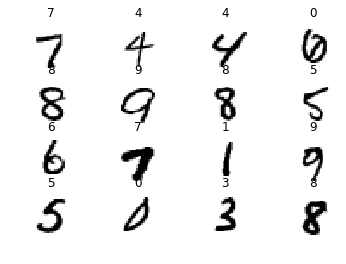

In [139]:
sample_viz = x.reshape((-1, 28, 28))
for index, val in enumerate(np.random.randint(num_simple, size=16)):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(sample_viz[val],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('%i' % y[val])
plt.show()

In [111]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7)

In [112]:
knn = KNeighborsClassifier(3)

In [113]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [140]:
print (knn.predict(xtrain[10:15]))
print(ytrain[10:15])

[ 0.  3.  6.  4.  6.]
[ 0.  3.  6.  4.  0.]


In [141]:
print (1-knn.score(xtrain, ytrain))

0.0885714285714


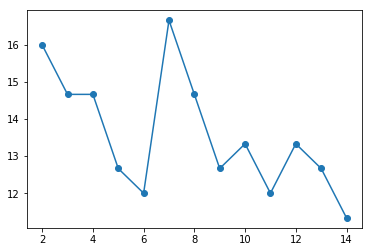

In [116]:
errors = []
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [131]:
knn = KNeighborsClassifier(3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [132]:
predict = knn.predict(xtest)

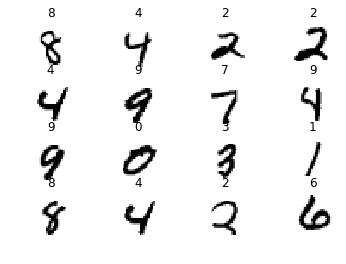

In [133]:
predict_viz = xtest.reshape((-1,28,28))
for index, val, in enumerate(np.random.randint(predict.shape[0], size=16)):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(predict_viz[val], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title('%i' % predict[val])
plt.show()

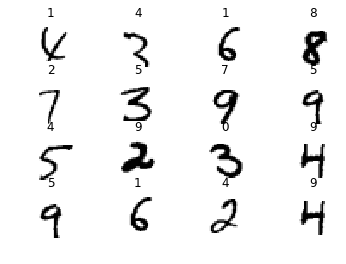

In [137]:
predict_viz = xtest.reshape((-1,28,28))
misclassified = predict_viz[ytest != predict]
misclassified_labels = predict[ytest != predict]
for index, val, in enumerate(np.random.randint(misclassified.shape[0], size=16)):
    plt.subplot(4,4,index+1)
    plt.axis('off')
    plt.imshow(predict_viz[val], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title('%i' % misclassified_labels[val])
plt.show()